# HW_4

In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [98]:
'''Завдання 1
Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися в коректному 
зчитуванні даних:'''

'Завдання 1\nЗавантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися в коректному \nзчитуванні даних:'

In [99]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


In [100]:
'''Для кожного дня прокату відомі такі ознаки:

season: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
yr: 0 — 2011, 1 — 2012
mnth: від 1 до 12
holiday: 0 — немає свята, 1 — є свято
weekday: від 0 до 6
workingday: 0 — неробочий день, 1 — робочий день
weathersit: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
temp: температура в Цельсіях
atemp: температура за відчуттями в Цельсіях
hum: вологість
windspeed(mph): швидкість вітру в милях за годину
windspeed(ms): швидкість вітру в метрах за секунду
cnt: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)
Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. 
З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на 
графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків.
На кожному має бути зображена залежність чергового атрибута від змінної cnt.'''

'Для кожного дня прокату відомі такі ознаки:\n\nseason: 1 — весна, 2 — літо, 3 — осінь, 4 — зима\nyr: 0 — 2011, 1 — 2012\nmnth: від 1 до 12\nholiday: 0 — немає свята, 1 — є свято\nweekday: від 0 до 6\nworkingday: 0 — неробочий день, 1 — робочий день\nweathersit: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)\ntemp: температура в Цельсіях\natemp: температура за відчуттями в Цельсіях\nhum: вологість\nwindspeed(mph): швидкість вітру в милях за годину\nwindspeed(ms): швидкість вітру в метрах за секунду\ncnt: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)\nОтже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. \nЗ номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на \nграфіках, як цільова ознака залежить від решти.\n\nПобудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати

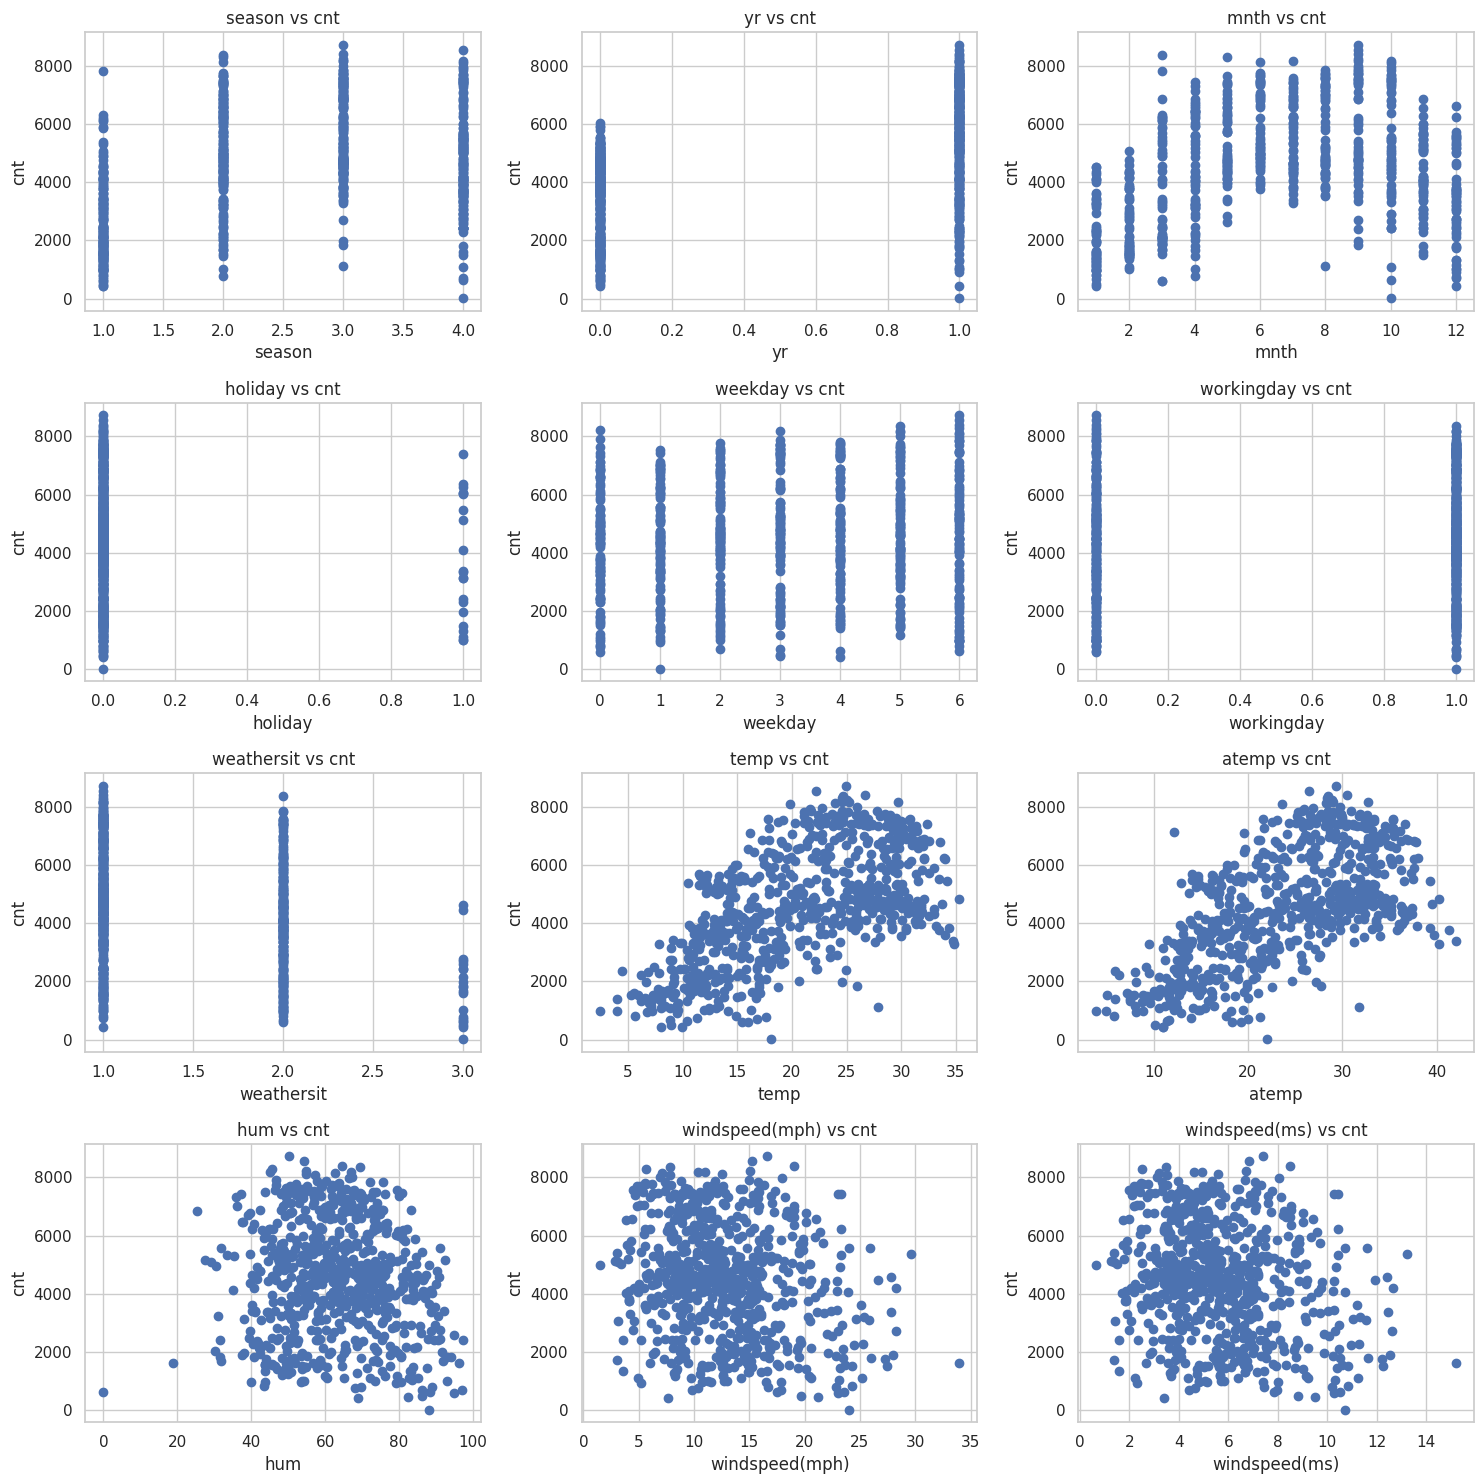

In [101]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row][col].scatter(df[feature], df['cnt'])
    axes[row][col].set_title(f'{feature} vs cnt')
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('cnt')

plt.tight_layout()
plt.show()

In [102]:
'''Запитання:
1. Яким є характер залежності кількості прокатів від місяця?
2. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.'''

'Запитання:\n1. Яким є характер залежності кількості прокатів від місяця?\n2. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.'

In [103]:
'''
1. Це сезонна залежність
2. temp/atemp та hum
'''

'\n1. Це сезонна залежність\n2. temp/atemp та hum\n'

In [104]:
'''Завдання 2
Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. 
Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. 
Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.'''

'Завдання 2\nДавайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. \nГарною мірою лінійної залежності між двома векторами є кореляція Пірсона. \nНам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.'

In [105]:
'''Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу corrwith.'''

'Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу corrwith.'

In [106]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [107]:
'''У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.
За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками'''

"У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.\nЗа графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками"

In [108]:
'''Завдання 3
Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr:'''

'Завдання 3\nПорахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr:'

In [109]:
correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
print(correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [110]:
'''На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp 
(корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, 
що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.'''

'На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp \n(корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, \nщо цей факт негативно позначається на навчанні лінійної моделі.\n\nНасамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.'

In [111]:
'''Виведіть середні ознак.'''

'Виведіть середні ознак.'

In [112]:
print(df.mean())

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [113]:
'''Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.'''

"Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки."

In [114]:
'''Проблема перша: колінеарні ознаки
Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, 
але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.
Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне 
відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.'''

'Проблема перша: колінеарні ознаки\nОтже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, \nале давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.\nДля початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне \nвідхилення. Це можна зробити за допомогою методу scale.\n\nКрім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.'

In [115]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [116]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [117]:
'''Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.'''

'Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.'

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
'''Завдання 5
Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі 
(ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), 
скориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns.'''

"Завдання 5\nСтворіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі \n(ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), \nскориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns."

In [120]:
# Створюємо об'єкт лінійного регресора
regressor = LinearRegression()

# Навчаємо регресор на всіх даних
regressor.fit(X, y)

# Отримуємо ваги моделі
weights = regressor.coef_

# Виводимо пари (назва ознаки, вага)
for feature, weight in zip(df.columns[:-1], weights):
    print(f"{feature}: {weight}")

season: 570.8637960129914
yr: 1021.9653779400622
mnth: -141.3017451148728
holiday: -86.7593446245368
weekday: 137.22506441350538
workingday: 56.391881775973005
weathersit: -330.2264620440312
temp: 367.48373260182126
atemp: 585.5493861188597
hum: -145.61430569885857
windspeed(mph): 12457138390688.885
windspeed(ms): -12457138390887.346


In [121]:
'''Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, 
чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:
w=(XTX)−1XTy

Якщо в X є колінеарні (лінійно-залежні) стовпці, матриця XTX стає виродженою, і формула перестає бути коректною. 
Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація Xw≈y. 
Таку ситуацію називають проблемою мультиколінеарності.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, 
однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. 
До оптимізуючого функціоналу додають  L1  або  L2  норму ваг, помножену на коефіцієнт регуляризації  α . 
У першому випадку метод називається Lasso, а у другому — Ridge.'''

"Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, \nчому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:\nw=(XTX)−1XTy\n\nЯкщо в X є колінеарні (лінійно-залежні) стовпці, матриця XTX стає виродженою, і формула перестає бути коректною. \nЧим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація Xw≈y. \nТаку ситуацію називають проблемою мультиколінеарності.\n\nЗ парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, \nоднак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.\n\nДля того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. \nДо оптимізуючого функціоналу додають  L1  або  L2  норму ваг, помножену на коефіцієнт регуляризації  α . \nУ першому випадку метод називається Lasso, а у другому — Ridge."

In [122]:
'''Завдання 6
Давайте спробуємо навчити лінійні моделі з  L1  і  L2 -регуляризацією, а далі порівняємо їхні ваги. 
Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.'''

'Завдання 6\nДавайте спробуємо навчити лінійні моделі з  L1  і  L2 -регуляризацією, а далі порівняємо їхні ваги. \nНавчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.'

In [123]:
'''Навчіть лінійну модель з  L1 -регуляризацією (клас Lasso) і виведіть ваги.'''

'Навчіть лінійну модель з  L1 -регуляризацією (клас Lasso) і виведіть ваги.'

In [124]:
from sklearn.linear_model import Lasso

# Створюємо об'єкт лінійної моделі з L1-регуляризацією (Lasso)
lasso_regressor = Lasso()

# Навчаємо модель
lasso_regressor.fit(X, y)

# Отримуємо ваги моделі
lasso_weights = lasso_regressor.coef_

# Виводимо пари (назва ознаки, вага)
for feature, weight in zip(df.columns[:-1], lasso_weights):
    print(f"{feature}: {weight}")

season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08


In [125]:
'''Навчіть лінійну модель з  L2 -регуляризацією (клас Ridge) і виведіть ваги.'''

'Навчіть лінійну модель з  L2 -регуляризацією (клас Ridge) і виведіть ваги.'

In [126]:
from sklearn.linear_model import Ridge

# Створюємо об'єкт лінійної моделі з L2-регуляризацією (Ridge)
ridge_regressor = Ridge()

# Навчаємо модель
ridge_regressor.fit(X, y)

# Отримуємо ваги моделі
ridge_weights = ridge_regressor.coef_

# Виводимо пари (назва ознаки, вага)
for feature, weight in zip(df.columns[:-1], ridge_weights):
    print(f"{feature}: {weight}")

season: 563.0645722520181
yr: 1018.9483787875305
mnth: -131.87332028247715
holiday: -86.74609799709232
weekday: 138.00511117871918
workingday: 55.90311037506467
weathersit: -332.34978849907367
temp: 386.45788919190807
atemp: 566.3470470600669
hum: -145.07132729867195
windspeed(mph): -99.25944108179067
windspeed(ms): -99.25944115434177


In [127]:
'''Завдання 7
На відміну від  L2 -регуляризації,  L1  обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, 
як змінюються ваги зі збільшенням коефіцієнта регуляризації  α .'''

'Завдання 7\nНа відміну від  L2 -регуляризації,  L1  обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, \nяк змінюються ваги зі збільшенням коефіцієнта регуляризації  α .'

In [128]:
'''Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги у список coefs_lasso, 
а потім навчіть Ridge і запишіть ваги у списокcoefs_ridge. Конвертуйте отримані списки в np.array.'''

'Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги у список coefs_lasso, \nа потім навчіть Ridge і запишіть ваги у списокcoefs_ridge. Конвертуйте отримані списки в np.array.'

In [129]:
alphas = np.arange(1, 500, 50)
coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    # Навчаємо регресор Lasso
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    
    # Навчаємо регресор Ridge
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

# Конвертуємо списки в масиви
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


In [130]:
'''Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:'''

'Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:'

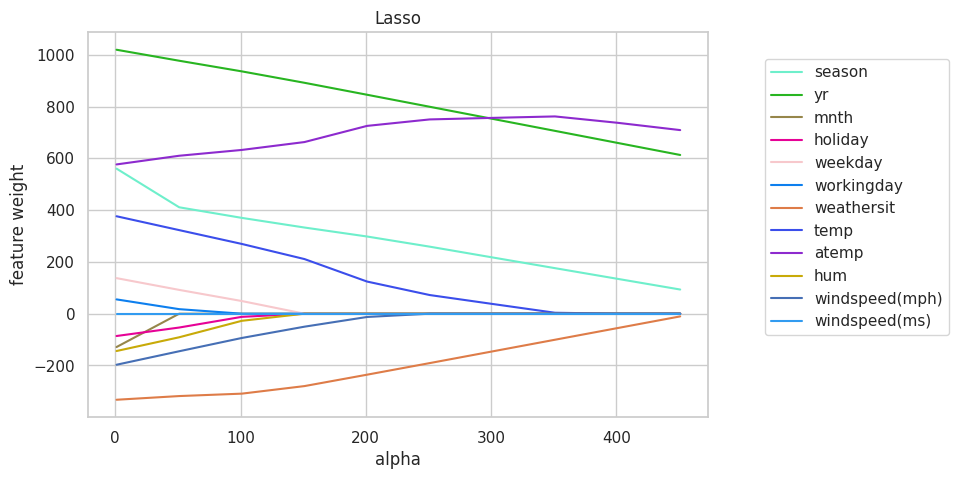

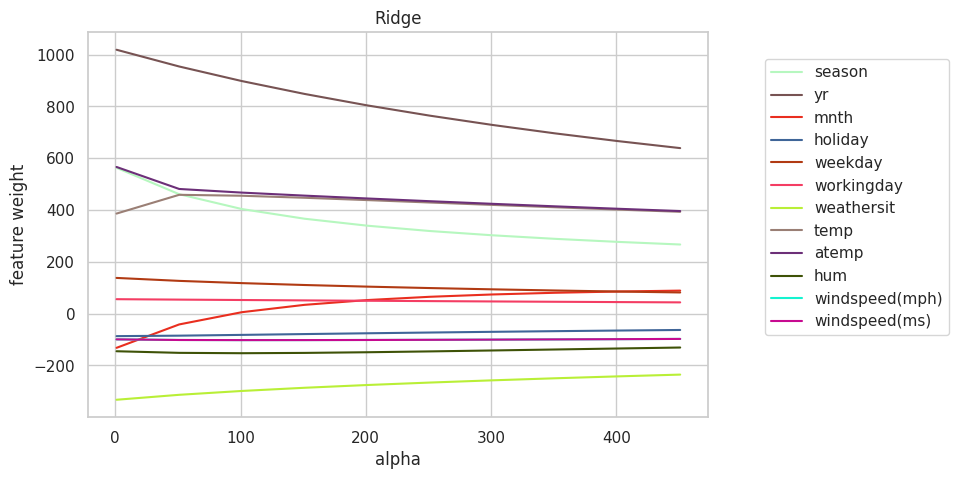

In [131]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [132]:
'''Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
2. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
3. Чи можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший  10−3 .
4. Який із регуляризаторів підійде для відбору неінформативних ознак?'''

'Проаналізуйте графіки та дайте відповіді на такі запитання.\n\n1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?\n2. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.\n3. Чи можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший  10−3 .\n4. Який із регуляризаторів підійде для відбору неінформативних ознак?'

In [133]:
'''
1. Регуляризатор Lasso агресивніше зменшує ваги при одному й тому самому значенні параметра регуляризації α, 
   ваги при Lasso швидше зменшуються до нуля порівняно з вагами при Ridge
2. Якщо α стає дуже великим для моделі Lasso, то всі ваги, окрім константи, зменшаться до нуля. 
   Це відбувається через те, що велике значення α призводить до того, що ваги кожної ознаки стають менш важливими в 
   оптимізаційному процесі, і модель намагається зменшити їх вплив на результат
3. Для Lasso можна стверджувати, що вона виключить одну з ознак windspeed при будь-якому значенні α > 0, 
   оскільки вага при цій ознаці буде зменшуватися до нуля. Для Ridge це стає менш ймовірним, оскільки ваги зменшуються, 
   але не до нуля, навіть при великих значеннях α. 
   Однак, якщо коефіцієнт при ознаці windspeed менший за 10^(-3), то можна припустити, що ця ознака буде виключеною
4. Для відбору неінформативних ознак краще підійде Lasso, оскільки вона здатна зменшити ваги ознак до нуля, виключаючи їх з моделі.
'''

'\n1. Регуляризатор Lasso агресивніше зменшує ваги при одному й тому самому значенні параметра регуляризації α, \n   ваги при Lasso швидше зменшуються до нуля порівняно з вагами при Ridge\n2. Якщо α стає дуже великим для моделі Lasso, то всі ваги, окрім константи, зменшаться до нуля. \n   Це відбувається через те, що велике значення α призводить до того, що ваги кожної ознаки стають менш важливими в \n   оптимізаційному процесі, і модель намагається зменшити їх вплив на результат\n3. Для Lasso можна стверджувати, що вона виключить одну з ознак windspeed при будь-якому значенні α > 0, \n   оскільки вага при цій ознаці буде зменшуватися до нуля. Для Ridge це стає менш ймовірним, оскільки ваги зменшуються, \n   але не до нуля, навіть при великих значеннях α. \n   Однак, якщо коефіцієнт при ознаці windspeed менший за 10^(-3), то можна припустити, що ця ознака буде виключеною\n4. Для відбору неінформативних ознак краще підійде Lasso, оскільки вона здатна зменшити ваги ознак до нуля, виключа

In [134]:
'''Завдання 8
Далі будемо працювати з Lasso.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу 
найменших квадратів, тобто Mean Square Error.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати alpha за значенням MSE на навчальній вибірці, 
тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття 
вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. 
Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. 
Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на K частин, і кожного разу брати одну з них як тестову, 
а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, LassoCV, 
який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. 
Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну mse_path_, матрицю розміру len(alpha) 
x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, 
у змінній alpha_ буде зберігатися вибране значення параметра регуляризації, а в coef_, традиційно, навчені ваги, 
що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; 
для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.'''

'Завдання 8\nДалі будемо працювати з Lasso.\n\nОтже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.\n\nДля цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу \nнайменших квадратів, тобто Mean Square Error.\n\nПо-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати alpha за значенням MSE на навчальній вибірці, \nтому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття \nвибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. \nТому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. \nНайзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на K частин, і кожного разу брати одну з них як тестову, \nа з блоків, що зал

In [135]:
'''Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. Побудуйте графік усередненого за рядками MSE 
в залежності від alpha (використовуйте для цього функцію create_plot).

Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.'''

'Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. Побудуйте графік усередненого за рядками MSE \nв залежності від alpha (використовуйте для цього функцію create_plot).\n\nВиведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.'

In [136]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [137]:
from sklearn.linear_model import LassoCV
alphas = np.arange(1, 100, 5)
regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

LassoCV(alphas=array([ 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
 86, 91, 96]),
 cv=3) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LassoCV LassoCV(alphas=array([ 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
 86, 91, 96]),
 cv=3)

In [138]:
'''Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, 
якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, 
що відповідають окремим блокам вибірки.'''

'Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, \nякби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, \nщо відповідають окремим блокам вибірки.'

In [139]:
'''Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто за стовпцями). 
На трьох окремих графіках візуалізуйте стовпці mse_path_.'''

'Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто за стовпцями). \nНа трьох окремих графіках візуалізуйте стовпці mse_path_.'

Alphas with minimum MSE:
Fold 1 : 6
Fold 2 : 1
Fold 3 : 51


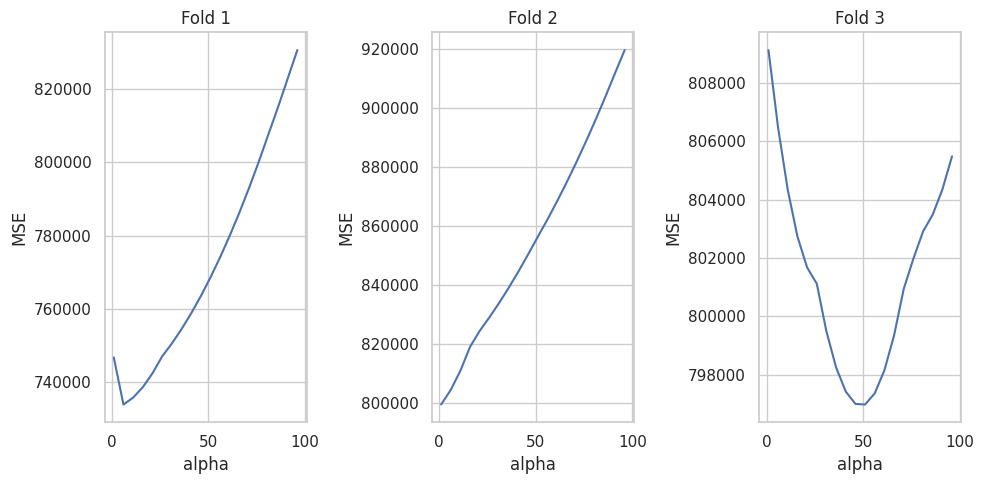

In [140]:
print("Alphas with minimum MSE:")
for fold, alpha_min in enumerate(regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]):
    print("Fold", fold + 1, ":", alpha_min)


plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i])
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.title("Fold " + str(i + 1))
plt.tight_layout()
plt.show()

In [141]:
'''На кожному розбитті оптимальне значення alpha своє, і йому відповідає велике MSE на інших розбиттях. 
Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. 
При виборі alpha на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.'''

'На кожному розбитті оптимальне значення alpha своє, і йому відповідає велике MSE на інших розбиттях. \nВиходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. \nПри виборі alpha на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.'

In [142]:
'''Завдання 10
Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.'''

'Завдання 10\nНарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.'

In [143]:
'''Запитання 1
В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), 
подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". 
'''

'Запитання 1\nВ останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), \nподивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". \n'

In [174]:
'''
temp
atemp
season
weekday

Відповідь 1: Видно ростаючу лінійну залежність cnt від цих ознак.
Відповідь 2: Не логічно, бо сильно високі значення ознак будуть знижувати бажання взяти велосипеди, так само як і їх низькі значення.
'''

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)'],
      dtype='object')
hum
season
windspeed(mph)
holiday
Відповідь 1: Видно ростаючу лінійну залежність cnt від цих ознак.
Відповідь 2: Не логічно, бо сильно високі значення ознак будуть знижувати бажання взяти велосипеди, так само як і їх низькі значення.


In [160]:
'''
Запитання 2
Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. 
Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, 
тим менше людей захочуть взяти велосипеди?
'''

'\nЗапитання 2\nВиберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. \nЧи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, \nтим менше людей захочуть взяти велосипеди?\n'

In [ ]:
'''
weathersit
hum
windspeed(mph)

Відповідь 1: Видно спадаючу лінійну залежність cnt від цих ознак.
Відповідь 2: Логічно, ці ріст цих ознак негативно впливає на бажання орендувати велосипед
'''

In [ ]:
'''Запитання 3
Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, 
чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?'''

In [ ]:
'''
hum
windspeed(mph)
mnth

Відповідь 1: Через низьку вагу, близьку до нуля.
Відповідь 2: Ці ознаки мають невеликий вплив на кількість прокатів велосипедів у порівнянні з іншими ознаками
'''

In [ ]:
'''Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, 
за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), 
тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу,
особливо якщо треба навчатися на великих обсягах даних.'''